In [1]:
import os
import numpy as np
import pandas as pd

# plotting modules
import matplotlib.colors as colors
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.sans-serif'] = "Arial" # missing fonts:: https://alexanderlabwhoi.github.io/post/2021-03-missingfont/
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams.update({'font.size': 14, 'axes.linewidth': 2, 'xtick.major.width': 1.5, 'xtick.major.size': 5, 'ytick.major.width': 1.5, 'ytick.major.size': 4})
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
def save_pdf(save_file, fig):
    pdf = PdfPages(save_file)
    pdf.savefig(fig, bbox_inches='tight', dpi=300)
    pdf.close()
    return

In [3]:
atf2_score_file = "/data5/deepro/starrseq/papers/results/7_cross_library_prediction/data/ATF2/peaks_vs_notpeaks/non_linear/scores.csv"
foxa1_score_file = "/data5/deepro/starrseq/papers/results/7_cross_library_prediction/data/FOXA1/peaks_vs_notpeaks/non_linear/scores.csv"

In [4]:
atf2_df = pd.read_csv(atf2_score_file).T.reset_index()
atf2_df.columns = ["metrics", "scores"]
atf2_df["library"] = "ATF2"
foxa1_df = pd.read_csv(foxa1_score_file).T.reset_index()
foxa1_df.columns = ["metrics", "scores"]
foxa1_df["library"] = "FOXA1"
plot_df = pd.concat((atf2_df, foxa1_df), axis=0)

In [21]:
sns.color_palette("RdBu", 10).as_hex()[0]

'#ab162a'

Text(0, 0.5, 'Metric scores')

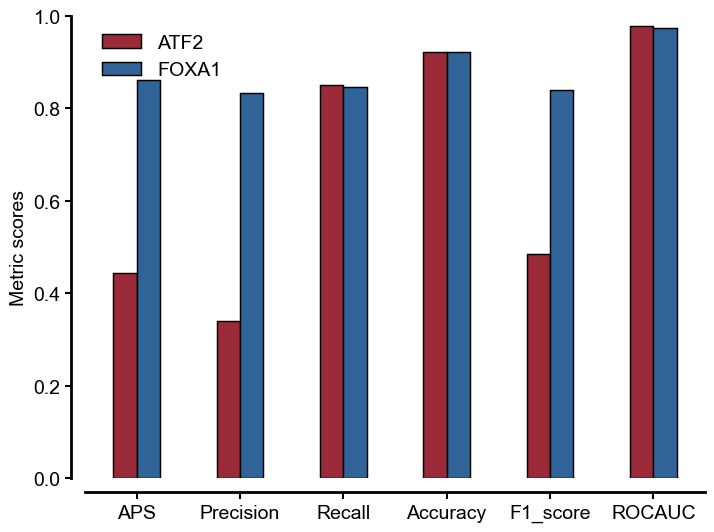

In [28]:
fig, ax = plt.subplots(figsize=(8,6))

g = sns.barplot(
    data=plot_df, x="metrics", y="scores", 
    hue="library", palette=[sns.color_palette("RdBu", 20).as_hex()[1], sns.color_palette("RdBu", 20).as_hex()[-2]], hue_order=["ATF2", "FOXA1"],
    width=0.45, ax=ax, edgecolor="k", linewidth=1.05)

g.axes.set_xticklabels(g.axes.get_xticklabels(), rotation=90)


ax.spines[["right", "top"]].set_visible(False)
ax.set_ylim(0.,1)
# ax.set_xlim(-0.25,2.25)
ax.legend(frameon=False)
ax.spines.left.set_position(('outward', 10))
ax.spines.bottom.set_position(('outward', 10))
ax.set_xlabel("")
ax.set_ylabel("Metric scores")

In [29]:
save_file = "../data/figures/cross_lib_compare.pdf"
save_pdf(save_file, fig)